# Feature extraction from 20 newsgroups documents

In [3]:
from os import listdir
from os.path import isfile, join
import string

In [4]:
my_path = '20_newsgroups'
No_sentences = 10

#creating a list of folder names to make valid pathnames later
folders = [f for f in listdir(my_path)]

In [5]:
folders

['talk.politics.misc',
 'comp.windows.x',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'talk.politics.guns',
 'talk.religion.misc',
 'rec.sport.baseball',
 'sci.med',
 'rec.sport.hockey',
 'sci.space',
 'rec.autos',
 'rec.motorcycles',
 'comp.sys.mac.hardware',
 'comp.sys.ibm.pc.hardware',
 'sci.crypt',
 'sci.electronics',
 'alt.atheism',
 'soc.religion.christian',
 'misc.forsale',
 'talk.politics.mideast']

In [6]:
#creating a 2D list to store list of all files in different folders

files = []
for folder_name in folders:
    folder_path = join(my_path, folder_name)
    files.append([f for f in listdir(folder_path)])

In [7]:
#checking total no. of files gathered

sum(len(files[i]) for i in range(20))

19997

In [8]:
#creating a list of pathnames of all the documents
#this would serve to split our dataset into train & test later without any bias

pathname_list = []
for fo in range(len(folders)):
    for fi in files[fo]:
        pathname_list.append(join(my_path, join(folders[fo], fi)))

In [9]:
len(pathname_list)

19997

In [10]:
#making an array containing the classes each of the documents belong to

Y = []
for folder_name in folders:
    folder_path = join(my_path, folder_name)
    num_of_files= len(listdir(folder_path))
    for i in range(num_of_files):
        Y.append(folder_name)

In [11]:
len(Y)

19997

##### splitting the data into train test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
doc_train, doc_test, Y_train, Y_test = train_test_split(pathname_list, Y, random_state=0, test_size=0.25)

## functions for word extraction from documents

In [14]:
stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at',
 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 
 'can', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during',
 'each', 'few', 'for', 'from', 'further', 
 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's",
 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself',
 "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself',
 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 
 'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", 
 "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 
 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
 "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't", 
 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 
 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', '1st', '2nd', '3rd',
 '4th', '5th', '6th', '7th', '8th', '9th', '10th']


In [15]:
#function to preprocess the words list to remove punctuations

def preprocess(words):
    #we'll make use of python's translate function,that maps one set of characters to another
    #we create an empty mapping table, the third argument allows us to list all of the characters 
    #to remove during the translation process
    
    #first we will try to filter out some  unnecessary data like tabs
    table = str.maketrans('', '', '\t')
    words = [word.translate(table) for word in words]
    
    punctuations = (string.punctuation).replace("'", "") 
    # the character: ' appears in a lot of stopwords and changes meaning of words if removed
    #hence it is removed from the list of symbols that are to be discarded from the documents
    trans_table = str.maketrans('', '', punctuations)
    stripped_words = [word.translate(trans_table) for word in words]
    
    #some white spaces may be added to the list of words, due to the translate function & nature of our documents
    #we remove them below
    words = [str for str in stripped_words if str]
    
    #some words are quoted in the documents & as we have not removed ' to maintain the integrity of some stopwords
    #we try to unquote such words below
    p_words = []
    for word in words:
        if (word[0] and word[len(word)-1] == "'"):
            word = word[1:len(word)-1]
        elif(word[0] == "'"):
            word = word[1:len(word)]
        else:
            word = word
        p_words.append(word)
    
    words = p_words.copy()
        
    #we will also remove just-numeric strings as they do not have any significant meaning in text classification
    words = [word for word in words if not word.isdigit()]
    
    #we will also remove single character strings
    words = [word for word in words if not len(word) == 1]
    
    #after removal of so many characters it may happen that some strings have become blank, we remove those
    words = [str for str in words if str]
    
    #we also normalize the cases of our words
    words = [word.lower() for word in words]
    
    #we try to remove words with only 2 characters
    words = [word for word in words if len(word) > 2]
    
    return words

In [16]:
#function to remove stopwords

def remove_stopwords(words):
    words = [word for word in words if not word in stopwords]
    return words

In [17]:
#function to convert a sentence into list of words

def tokenize_sentence(line):
    words = line[0:len(line)-1].strip().split(" ")
    words = preprocess(words)
    words = remove_stopwords(words)
    
    return words

In [18]:
#function to remove metadata

def remove_metadata(lines):
    start = 0
    #print(lines)
    for i in range(len(lines)):
        if(lines[i] == '\n'):
            start = i+1
            break
    new_lines = lines[start:start+No_sentences]
    #print("/n")
    #print("after lines /n")
    #print(new_lines)
    return new_lines

In [19]:
#function to convert a document into list of words

def tokenize(path):
    #load document as a list of lines
    f = open(path, 'r', encoding='utf8', errors='ignore')
    text_lines = f.readlines()
    
    #removing the meta-data at the top of each document
    text_lines = remove_metadata(text_lines)
    
    #initiazing an array to hold all the words in a document
    doc_words = []
    
    #traverse over all the lines and tokenize each one with the help of helper function: tokenize_sentence
    for line in text_lines:
        doc_words.append(tokenize_sentence(line))

    return doc_words

In [20]:
#a simple helper function to convert a 2D array to 1D, without using numpy

def flatten(list):
    new_list = []
    for i in list:
        for j in i:
            new_list.append(j)
    return new_list

## using the above functions on actual documents

In [21]:
len(folders)

20

In [22]:
list_of_words = []

for document in doc_train:
        list_of_words.append(flatten(tokenize(document)))
        

In [23]:
len(list_of_words)

14997

In [24]:
len(flatten(list_of_words))

513349

##### from above lengths we observe that the code has been designed in as such a way that the 2D list: list_of_words contains the vocabulary of each document file in the each of its rows, and collectively contains all the words we extract from the 20_newsgroups folder

In [25]:
import numpy as np
np_list_of_words = np.asarray(flatten(list_of_words))

In [26]:
#finding the number of unique words that we have extracted from the documents

words, counts = np.unique(np_list_of_words, return_counts=True)
len(words)

55536

In [27]:
#sorting the unique words according to their frequency

freq, wrds = (list(i) for i in zip(*(sorted(zip(counts, words), reverse=True))))

In [28]:
f_o_w = []
n_o_w = []
for f in sorted(np.unique(freq), reverse=True):
    f_o_w.append(f)
    n_o_w.append(freq.count(f))

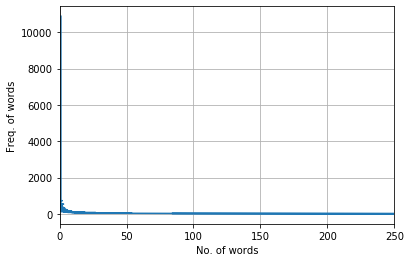

In [29]:
import matplotlib.pyplot as plt
y = f_o_w
x = n_o_w
plt.xlim(0,250)
plt.xlabel("No. of words")
plt.ylabel("Freq. of words")
plt.plot(x, y)
plt.grid()
plt.show()

### we'll start making our train data here onwards

In [30]:
#deciding the no. of words to use as feature

n = 5000
features = wrds[0:n]
print(features)

['writes', 'article', 'know', 'like', 'just', 'get', 'anyone', 'people', 'think', 'use', 'also', 'time', 'new', 'good', 'now', 'well', 'please', 'thanks', 'much', 'want', 'wrote', 'need', 'first', 'even', 'way', 'many', 'used', 'make', 'windows', 'right', 'really', 'see', 'system', 'problem', 'may', 'someone', 'say', 'something', 'using', 'question', 'drive', 'work', 'since', 'got', 'last', 'find', 'email', 'back', 'looking', 'help', 'said', 'believe', 'says', 'still', 'god', 'going', 'read', 'program', 'take', 'sure', 'might', 'david', 'information', 'seems', 'card', 'game', 'year', 'point', 'tell', 'etc', 'another', 'better', 'thing', 'car', 'things', 'anything', 'actually', 'without', 'years', 'never', 'made', 'heard', 'file', 'little', 'around', 'following', 'number', 'come', 'lot', 'post', 'put', 'give', 'try', 'run', 'long', 'old', 'must', 'fact', 'possible', 'look', 'set', 'seen', 'hard', 'computer', 'called', 'government', 'subject', 'best', 'software', 'bit', 'great', 'every',

In [31]:
#creating a dictionary that contains each document's vocabulary and ocurence of each word of the vocabulary 

dictionary = {}
doc_num = 1
for doc_words in list_of_words:
    #print(doc_words)
    np_doc_words = np.asarray(doc_words)
    w, c = np.unique(np_doc_words, return_counts=True)
    dictionary[doc_num] = {}
    for i in range(len(w)):
        dictionary[doc_num][w[i]] = c[i]
    doc_num = doc_num + 1

In [32]:
dictionary.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [33]:
#now we make a 2D array having the frequency of each word of our feature set in each individual documents

X_train = []
for k in dictionary.keys():
    row = []
    for f in features:
        if(f in dictionary[k].keys()):
            #if word f is present in the dictionary of the document as a key, its value is copied
            #this gives us no. of occurences
            row.append(dictionary[k][f]) 
        else:
            #if not present, the no. of occurences is zero
            row.append(0)
    X_train.append(row)

In [34]:
#we convert the X and Y into np array for concatenation and conversion into dataframe

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [35]:
len(X_train)

14997

In [36]:
len(Y_train)

14997

### we'll make our test data by performing the same operations as we did for train data

In [37]:
list_of_words_test = []

for document in doc_test:
        list_of_words_test.append(flatten(tokenize(document)))

In [38]:
dictionary_test = {}
doc_num = 1
for doc_words in list_of_words_test:
    #print(doc_words)
    np_doc_words = np.asarray(doc_words)
    w, c = np.unique(np_doc_words, return_counts=True)
    dictionary_test[doc_num] = {}
    for i in range(len(w)):
        dictionary_test[doc_num][w[i]] = c[i]
    doc_num = doc_num + 1

In [39]:
#now we make a 2D array having the frequency of each word of our feature set in each individual documents

X_test = []
for k in dictionary_test.keys():
    row = []
    for f in features:
        if(f in dictionary_test[k].keys()):
            #if word f is present in the dictionary of the document as a key, its value is copied
            #this gives us no. of occurences
            row.append(dictionary_test[k][f]) 
        else:
            #if not present, the no. of occurences is zero
            row.append(0)
    X_test.append(row)

In [40]:
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [41]:
len(X_test)

5000

In [42]:
len(Y_test)

5000

# Text Classification

### performing Text Classification using sklearn's Multinomial Naive Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
Y_predict = clf.predict(X_test)

##### testing scores

In [45]:
clf.score(X_test, Y_test)

0.7528

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, Y_predict))

                          precision    recall  f1-score   support

             alt.atheism       0.62      0.68      0.65       248
           comp.graphics       0.61      0.75      0.67       249
 comp.os.ms-windows.misc       0.70      0.72      0.71       240
comp.sys.ibm.pc.hardware       0.70      0.68      0.69       256
   comp.sys.mac.hardware       0.74      0.81      0.77       244
          comp.windows.x       0.81      0.71      0.75       253
            misc.forsale       0.79      0.74      0.76       259
               rec.autos       0.74      0.80      0.77       231
         rec.motorcycles       0.85      0.82      0.84       233
      rec.sport.baseball       0.85      0.87      0.86       261
        rec.sport.hockey       0.90      0.89      0.90       284
               sci.crypt       0.88      0.86      0.87       246
         sci.electronics       0.77      0.72      0.74       253
                 sci.med       0.80      0.83      0.82       269
         

##### training scores

In [47]:
Y_predict_tr = clf.predict(X_train)

In [48]:
clf.score(X_train, Y_train)

0.8662399146495966

In [49]:
print(classification_report(Y_train, Y_predict_tr))

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.85      0.82       752
           comp.graphics       0.74      0.86      0.79       751
 comp.os.ms-windows.misc       0.83      0.82      0.82       760
comp.sys.ibm.pc.hardware       0.82      0.84      0.83       744
   comp.sys.mac.hardware       0.89      0.85      0.87       756
          comp.windows.x       0.87      0.88      0.87       747
            misc.forsale       0.86      0.84      0.85       741
               rec.autos       0.87      0.90      0.88       769
         rec.motorcycles       0.91      0.92      0.92       767
      rec.sport.baseball       0.93      0.94      0.93       739
        rec.sport.hockey       0.96      0.95      0.96       716
               sci.crypt       0.94      0.93      0.93       754
         sci.electronics       0.88      0.83      0.86       747
                 sci.med       0.92      0.90      0.91       731
         

### performing Text Classification using my implementation of Multinomial Naive Bayes

#### functions for my implementation

In [50]:
#function to create a training dictionary out of the text files for training set, consisiting the frequency of
#words in our feature set (vocabulary) in each class or label of the 20 newsgroup

def fit(X_train, Y_train):
    result = {}
    classes, counts = np.unique(Y_train, return_counts=True)
    
    for i in range(len(classes)):
        curr_class = classes[i]
        
        result["TOTAL_DATA"] = len(Y_train)
        result[curr_class] = {}
        
        X_tr_curr = X_train[Y_train == curr_class]
        
        num_features = n
        
        for j in range(num_features):
            result[curr_class][features[j]] = X_tr_curr[:,j].sum() 
                
        result[curr_class]["TOTAL_COUNT"] = counts[i]
    
    return result

In [51]:
#function for calculating naive bayesian log probablity for each test document being in a particular class

def log_probablity(dictionary_train, x, curr_class):
    output = np.log(dictionary_train[curr_class]["TOTAL_COUNT"]) - np.log(dictionary_train["TOTAL_DATA"])
    num_words = len(x)
    for j in range(num_words):
        if(x[j] in dictionary_train[curr_class].keys()):
            xj = x[j]
            count_curr_class_equal_xj = dictionary_train[curr_class][xj] + 1
            count_curr_class = dictionary_train[curr_class]["TOTAL_COUNT"] + len(dictionary_train[curr_class].keys())
            curr_xj_prob = np.log(count_curr_class_equal_xj) - np.log(count_curr_class)
            output = output + curr_xj_prob
        else:
            continue
    
    return output

In [52]:
#helper function for the predict() function that predicts the class or label for one test document at a time

def predictSinglePoint(dictionary_train, x):
    classes = dictionary_train.keys()
    best_p = -10000
    best_class = -1
    for curr_class in classes:
        if(curr_class == "TOTAL_DATA"):
            continue
        p_curr_class = log_probablity(dictionary_train, x, curr_class)
        if(p_curr_class > best_p):
            best_p = p_curr_class
            best_class = curr_class
            
    return best_class

In [53]:
#predict function that predicts the class or label of test documents using train dictionary made using the fit() function

def predict(dictionary_train, X_test):
    Y_pred = []
    for x in X_test:
        y_predicted = predictSinglePoint(dictionary_train, x)
        Y_pred.append(y_predicted)
    
    #print(Y_pred)
    return Y_pred

#### performing the implementation

In [54]:
train_dictionary = fit(X_train, Y_train)

In [55]:
X_test = []

for key in dictionary_test.keys():
    X_test.append(list(dictionary_test[key].keys()))

In [56]:
my_predictions = predict(train_dictionary, X_test)

In [57]:
my_predictions = np.asarray(my_predictions)

In [58]:
accuracy_score(Y_test, my_predictions)

0.743

In [59]:
print(classification_report(Y_test, my_predictions))

                          precision    recall  f1-score   support

             alt.atheism       0.62      0.71      0.66       248
           comp.graphics       0.68      0.66      0.67       249
 comp.os.ms-windows.misc       0.63      0.72      0.67       240
comp.sys.ibm.pc.hardware       0.63      0.73      0.67       256
   comp.sys.mac.hardware       0.70      0.80      0.75       244
          comp.windows.x       0.82      0.68      0.74       253
            misc.forsale       0.90      0.60      0.72       259
               rec.autos       0.70      0.83      0.76       231
         rec.motorcycles       0.86      0.82      0.84       233
      rec.sport.baseball       0.87      0.87      0.87       261
        rec.sport.hockey       0.93      0.88      0.90       284
               sci.crypt       0.74      0.88      0.81       246
         sci.electronics       0.71      0.72      0.72       253
                 sci.med       0.87      0.77      0.81       269
         

Text(0.5, 1.0, 'MUltinomial NB')

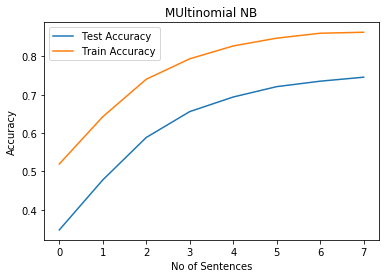

In [60]:
Test_accu = [0.3478,0.478,0.5886,0.656,0.694,0.721,0.7352,0.7456]
Train_accu = [0.5195,0.6426,0.7403,0.7935,0.827,0.8473,0.8601,0.8627]
plt.plot(Test_accu)
plt.plot(Train_accu)
plt.legend(["Test Accuracy", "Train Accuracy"])
plt.xlabel('No of Sentences')
plt.ylabel('Accuracy')
plt.title('MUltinomial NB')


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC()).fit(X_train, Y_train)